# Project: Investigate a Dataset (tmdb_movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
## The questions 
#### Research Question 1(Who are the actors with the most apperances?)
#### Research Question 2  (Which movies with the highest revenues ?)
#### Research Question 3  ( Did movies with higher vote count received a better rating?)
####  Research Question 4(What is the most popular movies ?)

In [3]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
# Load your data

data = pd.read_csv('tmdb-movies.csv')

In [8]:
print(data.shape)

(10866, 21)


In [9]:
print(list(data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [10]:
data.head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


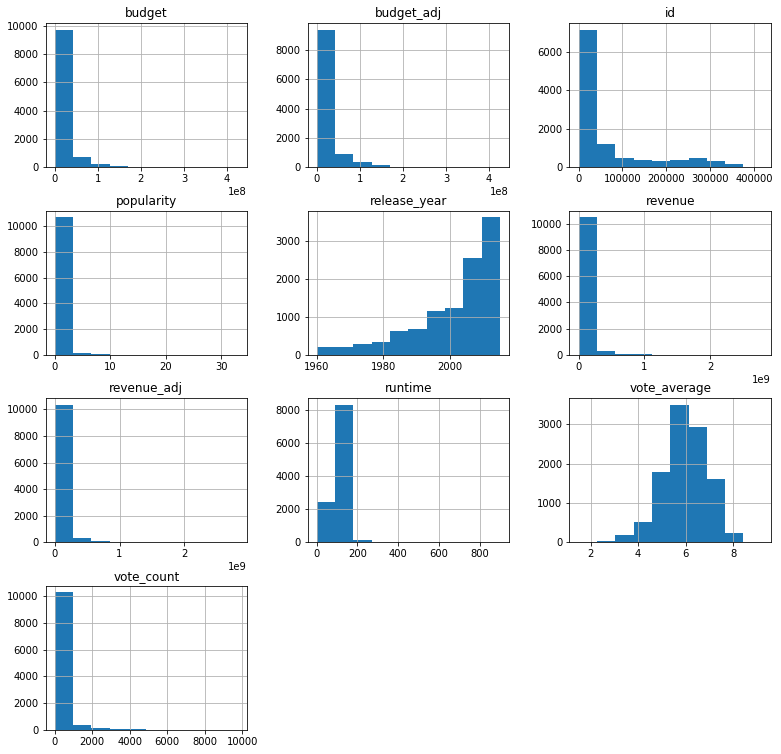

In [11]:
data.hist(figsize=(13,13));

In [12]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


from this I found that the data have some problems that need to be fixed like having null/nan values, some rows have values that need to be separated for example (cast column) and some columns has values that will not be important in the analysis procces like(imdb_id,homepage) also some columns has values of zero that need to be removed like in ( revenue_adj and budget_adj)  

### Data Cleaning (Fixing null values )

In [13]:
#removing nan values from cast column, keeping only movies, that has casted actors
#also removing rows where revenue_adj and budget_adj is equal to zero
data = data[data["cast"].isnull() == False]
data = data[data["genres"].isnull() == False]

data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

In [14]:
#splitting the values separated with | into multible columns 
data_c = (data['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
data_d = (data['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
data_k = (data['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
data_g = (data['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
data_p = (data['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

In [15]:
data_g.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


like shown in the table above the cast column was splitted into five columns putting each actor alone 
this procces was performed for the following columns (cast,director,keywords,genres,production_companies) they were changed into
(data_c,data_d,data_k,data_g,data_p) in order

In [18]:
#removing the old columns and adding the new ones into the dataframe
df = data.join([data_c, data_d, data_k, data_g, data_p])
df = data.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)


# remember
### old column name > new column name
#### cast > data_c
#### director > data_d
#### keywords > data_k
#### genres > data_g
#### production_companies > data_p

In [19]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

No duplicated values, no zeroes and no nulls
Now the data is clean and ready for asking questions

### Research Question 1(Who are the actors with the most apperances?)

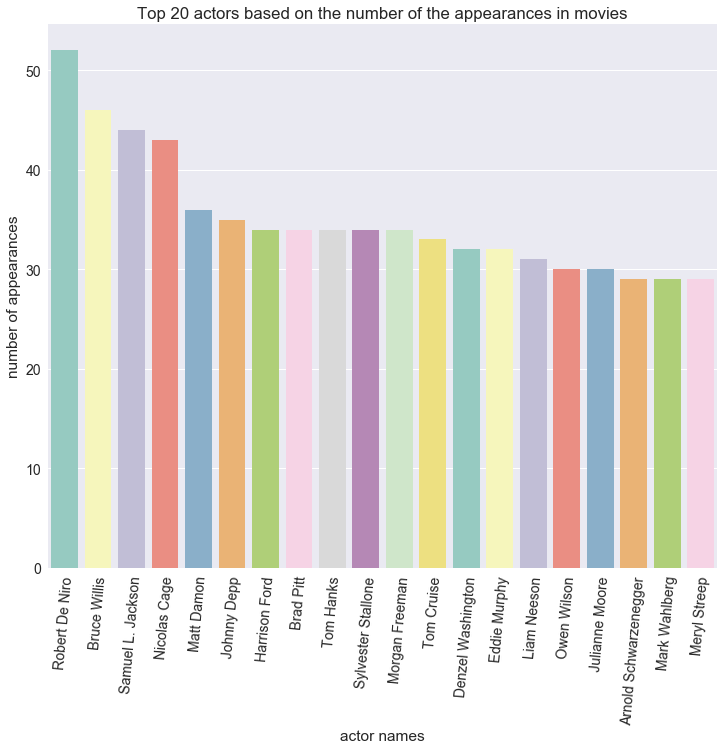

In [104]:
#Creating a dict for the cast, and how many times each actor casted for movies
actor_dict = {}

actors = data["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

A bar chart shows that "Robert De Niro" followed by "Bruce wills" and "Samuel L. Jackson" in order has the most appearances among the actors, the bar chart is ideal for this comparison because it shows every actor with his number of appearances

### Research Question 2  (Which movies with the highest revenues ?)


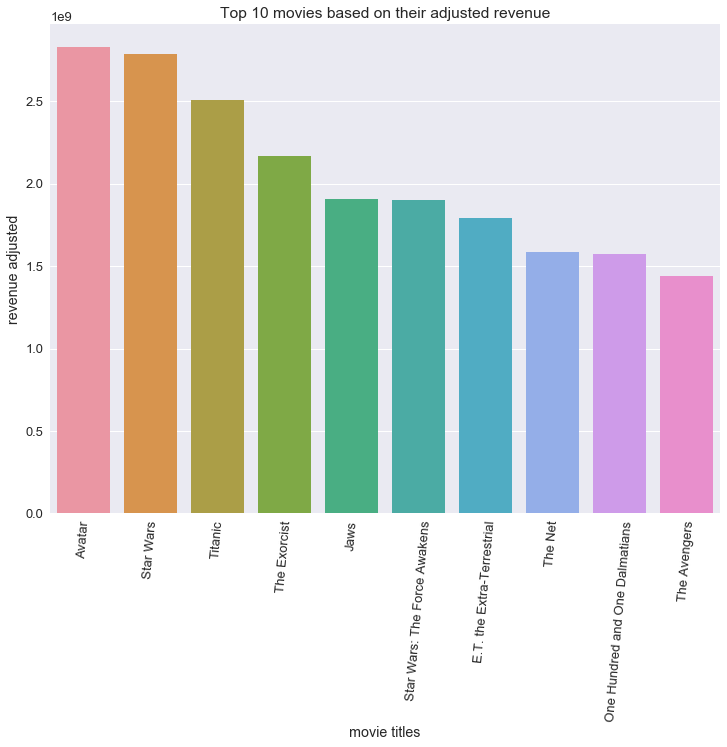

In [105]:
#Highest money making movies 
revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = data[["original_title", "revenue_adj"]]
movies_and_budget = data[['original_title','budget_adj']]
movies_and_popularity = data[['original_title','popularity']]
movies_and_votes= data[['original_title','vote_average']]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

this chart shows that "Avatar" is the best money-making movie then "Star wars" then "Titanic" The bar is perfect here as there is not alot of data  

### Research Question 3  ( Did movies with higher vote count received a better rating?)

In [106]:
data_vote = data.loc[:, 'vote_count' : 'vote_average']
data_vote_2000 = data_vote[data_vote['vote_count'] > 2000]

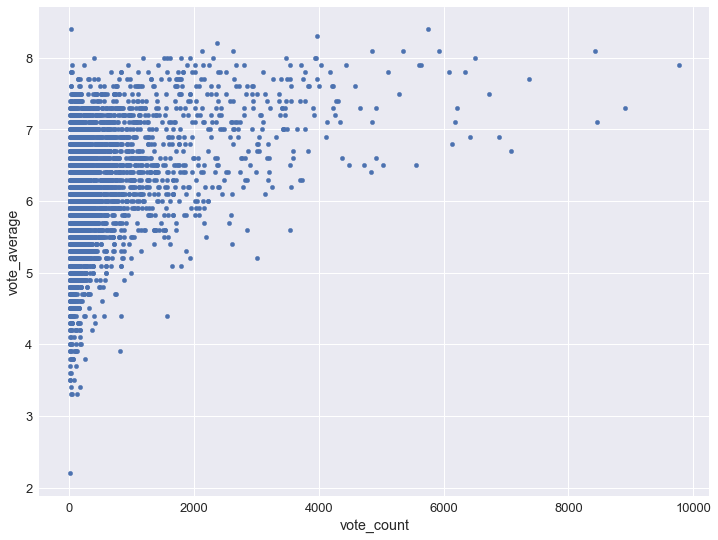

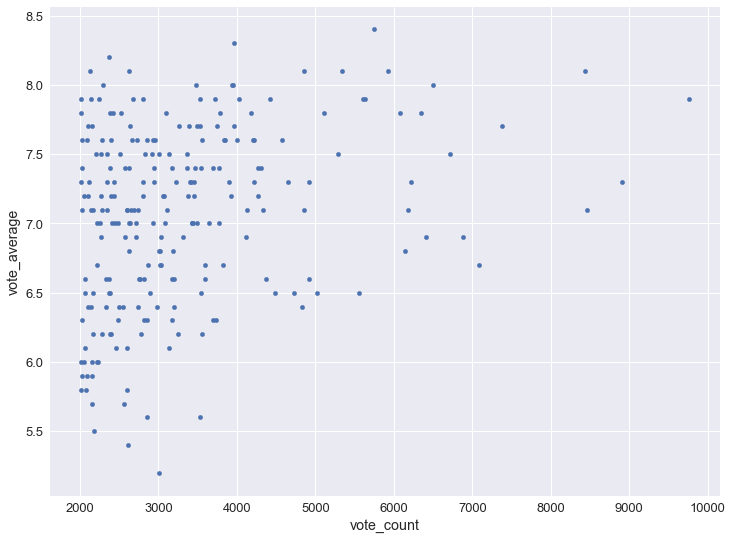

In [107]:
data_vote.plot(x='vote_count', y='vote_average', kind='scatter');
data_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

this plot shows the relationship between the vote average and vote count which seems to be a positive correlation which menas the higher the vote count the higher the vote average this plot is good as the numbers of data is huge 

### Research Question 4(What is the most popular movies ?)

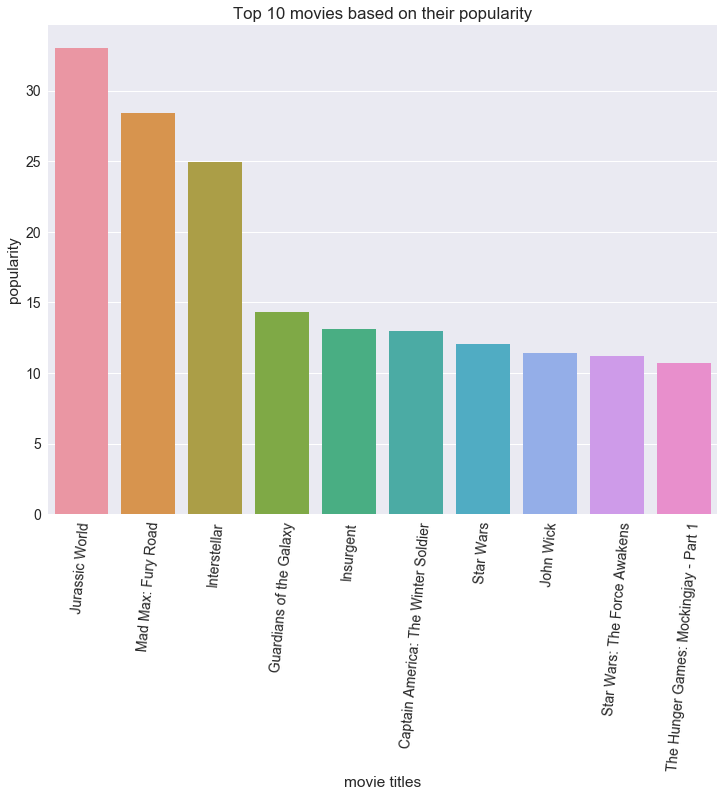

In [108]:
#Top 10 movie with the highest popularity

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()


This bar chart is showing the most popular movies starting with "Jurassic World" as the most popular it shows aslo there is big difference between "Interstellar" and "Guardians of The Galaxy", and from "Gurdians of The Galaxy" to "The Hunger Games: Movkingjay-part1" has close numbers of views 

<a id='conclusions'></a>
## Conclusions

### dataset and limitations 
This dataset has tons of movies with tons of information about these movies but it had some limitations that could make the analysis procces inaccurate. these limitations were "0 values","null values" and some columns that had more than one value separated with "|". that limitations were handled, as null values and 0 values were removed and the columns that had more than one value were separated into multible columns with one value for each. 
### questions and answers
 for this dataset I asked 4 research questions 
#### Research Question 1(Who are the actors with the most apperances?)
 top actors with with the most apperances were (matt demon, mark wahlberg, samuel l. jackson, brad pitt............., tom hanks)
#### Research Question 2  (Which movies with the highest revenues ?)
the movies with the highest profit were (avatar,starwars,titanic,the exorcist,.............,jurassic world)
#### Research Question 3  ( Did movies with higher vote count received a better rating?)
the movies with the most vote counts have better rating average than the lower vote counts (positive correlation)
####  Research Question 4(What is the most popular movies ?)
the most popular movies in the data set were (jurassic world,mad max: fury road, interstellar,guardiand of the galaxy and insurgent)
##### There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.